In [1]:
!pip install -U tensorflow_datasets


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#import fmnist_import
#import dataset_load
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#myData = model_data('fashion_mnist')
#train_dataset, test_dataset = load_dataset('fashion_mnist')

2022-07-30 09:11:57.229325: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [8]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

2022-07-30 09:12:10.567498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-30 09:12:13.589039: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21322 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:00:06.0, compute capability: 7.5
2022-07-30 09:12:13.597972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21322 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:00:07.0, compute capability: 7.5


In [9]:
class_names = metadata.features['label'].names
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [79]:
# Explore the data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('number of training examples: {}'.format(num_train_examples))
print('number of test examples:     {}'.format(num_test_examples))

number of training examples: 60000
number of test examples:     10000


In [80]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images = images / 125.5 - 1.0 
    labels = labels
    return images, labels

# The map function applies the normalizae function to each elelment in the train and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [73]:
# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache() #.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache() # .batch(BATCH_SIZE)

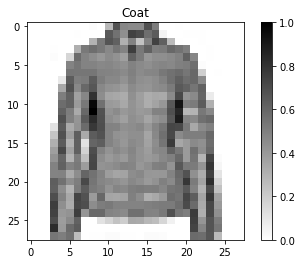

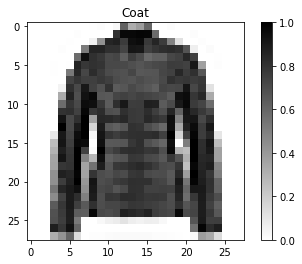

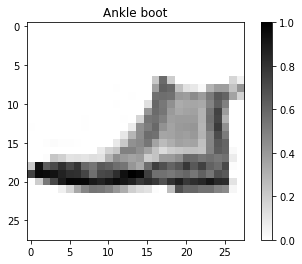

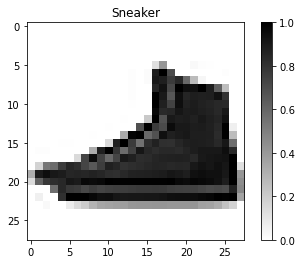

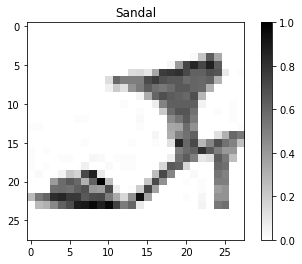

2022-07-29 19:13:38.522262: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-07-29 19:13:38.522413: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [23]:
# Explore the processed data

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(5):
    #image = image.numpy().reshape((28,28))
    
    # Plot the image 
    plt.figure()
    plt.imshow(image, cmap = plt.cm.binary)
    plt.title(class_names[label])
    plt.colorbar()
    plt.show()

2022-07-29 19:13:46.599969: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-07-29 19:13:46.600149: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


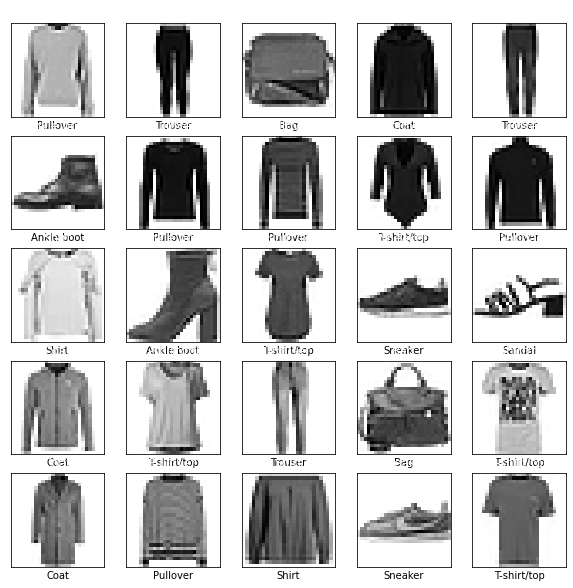

In [24]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
 
    plt.imshow(image, cmap=plt.cm.binary)
   plt.xlabel(class_names[label], color='white')
plt.show()

In [81]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [102]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6150 - accuracy: 0.7809
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4637 - accuracy: 0.8349
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4280 - accuracy: 0.8466
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4099 - accuracy: 0.8532
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3861 - accuracy: 0.8609


In [103]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8631
Accuracy on test dataset: 0.863099992275238


In [84]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [29]:
predictions.shape

(32, 10)

In [30]:
predictions[0]

array([7.5172444e-05, 3.5167726e-05, 3.9034564e-02, 1.2286675e-06,
       9.3507695e-01, 1.1580428e-07, 2.5759649e-02, 2.8798202e-09,
       1.7191176e-05, 8.2851574e-09], dtype=float32)

In [34]:
class_no = np.argmax(predictions[0])
print(class_no)
print(class_names[class_no])

4
Coat


In [37]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='white')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

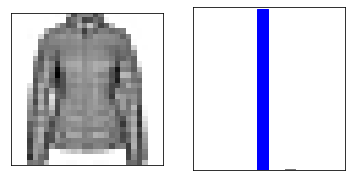

In [104]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

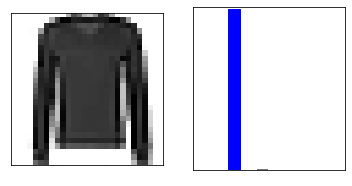

In [105]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

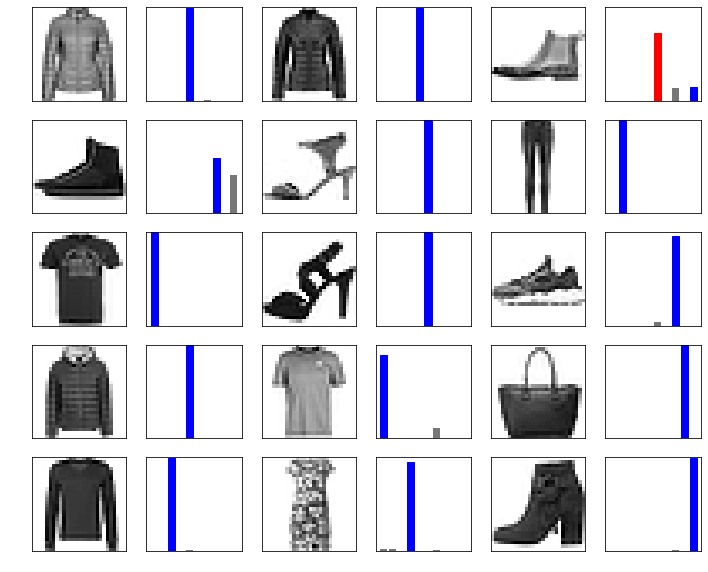

In [106]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [90]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [91]:
# Add the image to a batch where it's the only member.
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# So even though we're using a single image, we need to add it to a list:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [92]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.9693627e-07 3.0736626e-08 2.3482158e-03 1.9947302e-07 9.9054128e-01
  2.3021512e-11 7.1095275e-03 7.3238264e-12 1.4788388e-07 7.5313028e-12]]


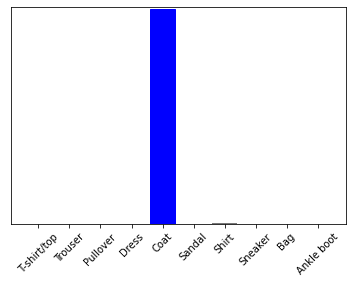

In [93]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [94]:
np.argmax(predictions_single[0])

4